In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
!pip install mlxtend


In [3]:
X,y = make_circles(n_samples=100,noise=0.1,random_state=1)

<Axes: >

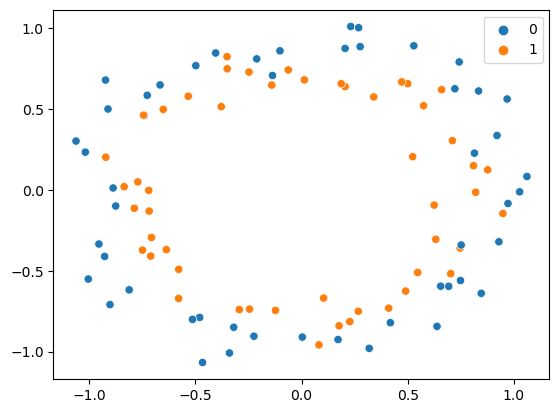

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train

array([[ 0.9717675 , -0.08311653],
       [-0.65134504,  0.49909484],
       [ 0.49009938, -0.62509577],
       [-0.71742651, -0.13028889],
       [ 0.17659668, -0.83997859],
       [-0.47960986, -0.7880243 ],
       [-0.12292134, -0.74493827],
       [ 0.27602586,  0.88730559],
       [-0.24733259,  0.73011595],
       [ 0.18668802,  0.6580003 ],
       [ 0.17181003, -0.92504802],
       [ 0.26707772, -0.74994685],
       [ 0.80940293,  0.15076116],
       [ 0.6927241 , -0.59576417],
       [-0.70669469, -0.29357585],
       [-0.49776571,  0.76955129],
       [ 0.52855241,  0.89270399],
       [ 0.22716539, -0.81418053],
       [ 0.31843503, -0.97937344],
       [-0.90187751, -0.70895455],
       [ 0.62430557, -0.0931694 ],
       [ 0.10385825, -0.66844291],
       [-0.57839322, -0.49081236],
       [-0.78743102, -0.11249056],
       [-0.9539309 , -0.33410313],
       [ 0.23161178,  1.01205842],
       [-0.92695735, -0.41057272],
       [-0.33930852, -1.0080984 ],
       [-0.74376426,

In [7]:
print(X_train.shape,X_test.shape)

(80, 2) (20, 2)


In [8]:
y_train

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [9]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,verbose=0)  
#verbose = 0 ie false so that output is not printed


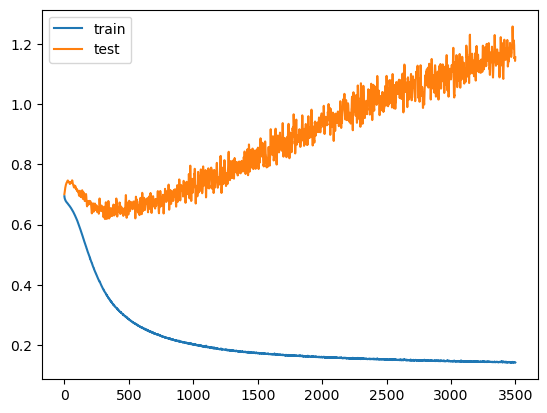

In [12]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

Here so many epochs results in overfitting.
Loss is increased and accuracy is reduced

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


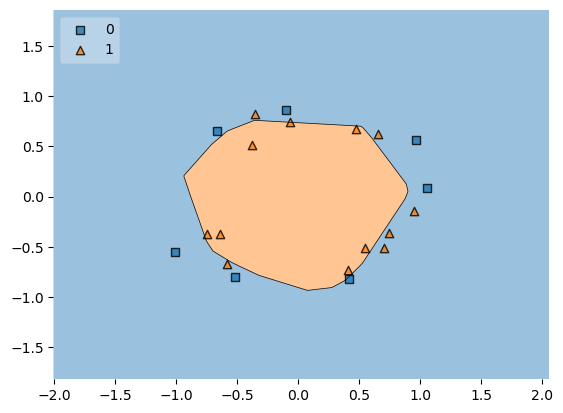

In [13]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

# Early Stopping

In [14]:
model = Sequential()
model.add(Dense(256,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
callback = EarlyStopping(
monitor='val_loss',min_delta=0.00001,patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

monitor - on which parameter we want to apply this
min_delta - min change to quantify as improvement
patience - no of epochs with no improvement after which training will stop
verbose = 1 - it will show at what epoch the early breaking has occured
mode = auto generally, keras itself figure out 
baseline - baseline value for the monitored quantity
restore_best_weights =True - whichever epoch will have least loss value, that weights will be set in our results.

In [18]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.5102 - loss: 0.6880 - val_accuracy: 0.3500 - val_loss: 0.7050
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5227 - loss: 0.6876 - val_accuracy: 0.3500 - val_loss: 0.7092
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5305 - loss: 0.6824 - val_accuracy: 0.3500 - val_loss: 0.7142
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5656 - loss: 0.6803 - val_accuracy: 0.3500 - val_loss: 0.7179
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5695 - loss: 0.6739 - val_accuracy: 0.3500 - val_loss: 0.7215
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5227 - loss: 0.6837 - val_accuracy: 0.3500 - val_loss: 0.7235
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5188 - loss: 0.6821 - val_accuracy: 0.3500 - val_loss: 0.7259
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5031 - loss: 0.6850 - val_accuracy: 0.3500 - 

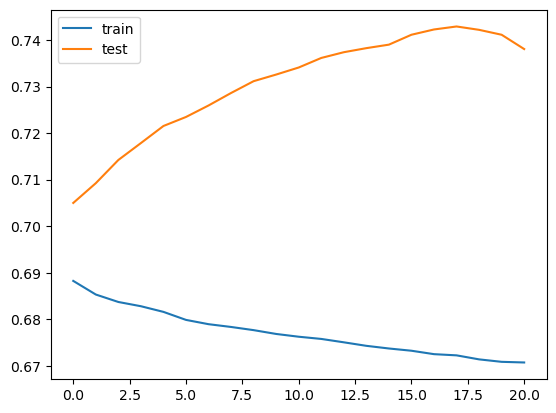

In [19]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

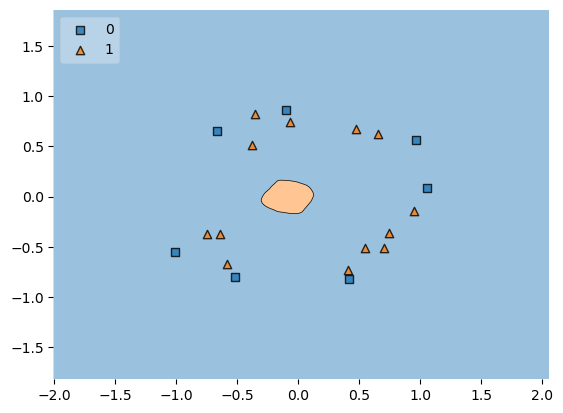

In [20]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show